<a href="https://colab.research.google.com/github/shaharukhkhan4350/Class/blob/master/Sequence_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%matplotlib inline
from d2l import torch as d2l
import torch 
import torch.nn as nn

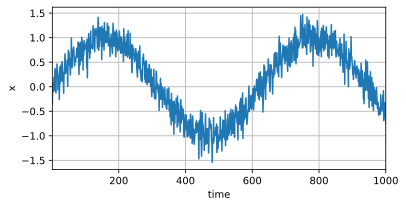

In [18]:
T = 1000 # Generate a total of 1000 points
time =  torch.arange(1, T+1, dtype=torch.float32)
x =  torch.sin(0.01 * time) +  torch.normal(0, 0.2, (T, ))
d2l.plot(time, [x], 'time', 'x', xlim = [1, 1000], figsize = (6,3))

In [19]:
tau =4 
features =  torch.zeros((T -  tau, tau))
for i in range(tau):
  features[:, i] = x[i:T - tau + i]
labels =  d2l.reshape(x[tau:], (-1, 1))

batch_size, n_train = 16, 600
train_iter =  d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

In [20]:
# function to initializing the weights of the network
def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform_(m.weight)

# A simple MLP

def get_net():
  net =  nn.Sequential(nn.Linear(4, 10),
                       nn.ReLU(),
                       nn.Linear(10, 1))
  net.apply(init_weights)
  return net
  

# Square Loss 
loss = nn.MSELoss()

In [21]:
def train(net, train_iter, loss, epochs, lr):
  trainer =  torch.optim.Adam(net.parameters(), lr)
  for epoch in range(epochs):
    for X, y in train_iter:

      trainer.zero_grad()
      l =  loss(net(X), y)
      l.backward()
      trainer.step()
    print(f'epoch {epoch + 1}, 'f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)


epoch 1, loss: 0.071135
epoch 2, loss: 0.059893
epoch 3, loss: 0.055395
epoch 4, loss: 0.051663
epoch 5, loss: 0.051207


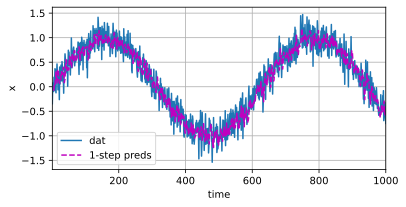

In [22]:
# Predictions 

onestep_preds = net(features)
d2l.plot([time, time[tau:]],[d2l.numpy(x), d2l.numpy(onestep_preds)], 'time', 'x', legend=['dat', '1-step preds'], xlim=[1, 1000], figsize=(6, 3) )

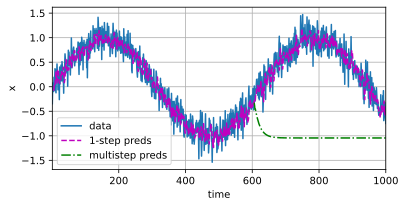

In [29]:
# Multistep prediction

multistep_preds =  torch.zeros(T)
multistep_preds[:n_train + tau] =  x[:n_train + tau]
for i in range(n_train +  tau, T):
  multistep_preds[i] =  d2l.reshape(net(
      multistep_preds[i - tau: i].reshape(1, -1)), 1)
  
d2l.plot([time, time[tau:], time[n_train + tau: ]],
         [d2l.numpy(x), d2l.numpy(onestep_preds),
          d2l.numpy(multistep_preds[n_train + tau:])], 'time', 'x',
         legend= ['data', '1-step preds', 'multistep preds'], xlim=[1, 1000], figsize=(6, 3))